In [99]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [100]:
from sklearn.model_selection import train_test_split

In [130]:
loan = pd.read_csv('http://iali.in/datasets/loan_status_train.csv')

In [131]:
loan.head(10)
#loan.shape

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [167]:
# Replacing missing values

loan['Self_Employed'].fillna(0,inplace=True)
loan['Gender'].fillna(loan['Gender'].mode()[0],inplace=True)
loan['Dependents'].fillna(loan['Dependents'].mode()[0],inplace=True)
loan['Married'].fillna(loan['Married'].mode()[0],inplace=True)
loan['Credit_History'].fillna(loan['Credit_History'].mode()[0],inplace=True)

loan["LoanAmount"].fillna(loan.groupby("Gender")["LoanAmount"].transform("median"), inplace=True)
loan["Loan_Amount_Term"].fillna(loan.groupby("Gender")["Loan_Amount_Term"].transform("median"), inplace=True)
loan["Loan_Amount_Term"].fillna(loan.groupby("Gender")["Loan_Amount_Term"].transform("median"), inplace=True)



In [169]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null int64
Gender               614 non-null int64
Married              614 non-null int64
Dependents           614 non-null object
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 62.5+ KB


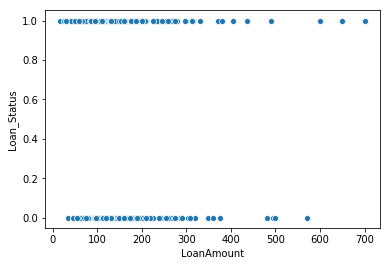

In [170]:
t = loan['LoanAmount'][:500]
ty = loan['Loan_Status'][:500]
sns.scatterplot(x=t,y=ty,data=loan)


In [171]:
#
loan = loan.replace(to_replace ="3+", 
                 value =3)


In [172]:
NUMERIC_COLUMN = ['Dependents','CoapplicantIncome','ApplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
CATEGORICAL_COLUMN1 = list(loan.columns)
CATEGORICAL_COLUMN = CATEGORICAL_COLUMN1.copy()
for x in CATEGORICAL_COLUMN1:
  if x in NUMERIC_COLUMN:
    CATEGORICAL_COLUMN.remove(x)
print(CATEGORICAL_COLUMN)
print(NUMERIC_COLUMN)

['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
['Dependents', 'CoapplicantIncome', 'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [173]:
from sklearn.preprocessing import LabelEncoder

In [174]:
le = LabelEncoder()

In [175]:
for i in CATEGORICAL_COLUMN:
    loan[i] = le.fit_transform(list(loan[i]))
loan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,609,0,0,0,0,1,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,1,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,1,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,1,7583,0.0,187.0,360.0,1.0,2,1
613,613,0,0,0,0,2,4583,0.0,133.0,360.0,0.0,1,0


In [176]:
x_index = list(loan.columns)
#x_index.remove('Loan_Status')

In [177]:
y_index = ['Loan_Status']


In [178]:
X = loan[x_index]
X

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,1,5849,0.0,130.0,360.0,1.0,2,1
1,1,1,1,1,0,1,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,2,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,1,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,1,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,1,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,1,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,1,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,1,7583,0.0,187.0,360.0,1.0,2,1


In [179]:
Y = loan[y_index]
Y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [180]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [181]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 260 to 265
Data columns (total 13 columns):
Loan_ID              491 non-null int64
Gender               491 non-null int64
Married              491 non-null int64
Dependents           491 non-null object
Education            491 non-null int64
Self_Employed        491 non-null int64
ApplicantIncome      491 non-null int64
CoapplicantIncome    491 non-null float64
LoanAmount           491 non-null float64
Loan_Amount_Term     491 non-null float64
Credit_History       491 non-null float64
Property_Area        491 non-null int64
Loan_Status          491 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 53.7+ KB


In [182]:
x_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
260,260,1,1,1,0,1,6083,4250.0,330.0,360.0,1.0,2,1
303,303,1,1,1,0,1,1625,1803.0,96.0,360.0,1.0,2,1
407,407,0,0,0,1,1,2213,0.0,66.0,360.0,1.0,0,1
261,261,1,0,0,0,1,2060,2209.0,134.0,360.0,1.0,1,1
352,352,1,1,3,0,1,2666,2083.0,95.0,360.0,1.0,0,1


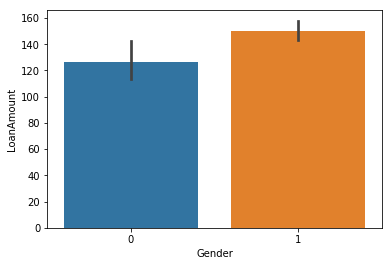

In [183]:
sns.barplot(x='Gender',y='LoanAmount', data=loan)

In [184]:
# splitting the data in 80:20

x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 260 to 265
Data columns (total 13 columns):
Loan_ID              491 non-null int64
Gender               491 non-null int64
Married              491 non-null int64
Dependents           491 non-null object
Education            491 non-null int64
Self_Employed        491 non-null int64
ApplicantIncome      491 non-null int64
CoapplicantIncome    491 non-null float64
LoanAmount           491 non-null float64
Loan_Amount_Term     491 non-null float64
Credit_History       491 non-null float64
Property_Area        491 non-null int64
Loan_Status          491 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 53.7+ KB


In [185]:
from sklearn.linear_model import LogisticRegression

In [186]:
model = LogisticRegression()

In [187]:
model.fit(x_train,y_train)

/home/coder/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/coder/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [188]:
model.predict(x_test)

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [189]:
model.score(x_test,y_test)

1.0